In [107]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
data = pd.read_csv('clv_data.csv')

In [109]:
data.head()

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
0,0,0,NaN,Male,126895,14.0,San Francisco,0
1,1,1,NaN,Male,161474,14.0,Tokyo,0
2,2,2,24.0,Male,104723,34.0,London,1
3,3,3,29.0,Male,43791,28.0,London,2
4,4,4,18.0,Female,132181,26.0,London,2


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5000 non-null   int64  
 1   id                5000 non-null   int64  
 2   age               2554 non-null   float64
 3   gender            5000 non-null   object 
 4   income            5000 non-null   int64  
 5   days_on_platform  4859 non-null   float64
 6   city              5000 non-null   object 
 7   purchases         5000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 312.6+ KB


### dropping the Unnamed  and id columns as they are replicas of the index

In [111]:
data.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'income', 'days_on_platform',
       'city', 'purchases'],
      dtype='object')

In [112]:
data.drop(['Unnamed: 0', 'id'], inplace=True, axis=1)

In [113]:
data

,age,gender,income,days_on_platform,city,purchases
0,NaN,Male,126895,14.0,San Francisco,0
1,NaN,Male,161474,14.0,Tokyo,0
2,24.0,Male,104723,34.0,London,1
3,29.0,Male,43791,28.0,London,2
4,18.0,Female,132181,26.0,London,2
...,...,...,...,...,...,...
4995,NaN,Female,212261,28.0,San Francisco,1
4996,NaN,Male,70228,12.0,San Francisco,0
4997,NaN,Male,64995,14.0,New York City,0
4998,NaN,Male,56144,4.0,New York City,2


### Handling missigness

In [114]:
data.describe()

,age,income,days_on_platform,purchases
count,2554.000000,5000.000000,4859.000000,5000.000000
mean,30.202036,79593.336200,24.389998,1.101000
std,12.129439,60304.056095,18.153388,1.181473
min,10.000000,4.000000,1.000000,0.000000
25%,19.000000,32752.500000,10.000000,0.000000
50%,30.000000,65989.000000,21.000000,1.000000
75%,41.000000,115406.500000,35.000000,2.000000
max,50.000000,388572.000000,111.000000,6.000000


In [115]:
data.isnull().sum()

age                 2446
gender                 0
income                 0
days_on_platform     141
city                   0
purchases              0
dtype: int64

### age and days_on_platfrom columns contain missing values

In [116]:
total_count = data.index.size
age_missing = total_count - data['age'].count()
dop_missing = total_count - data['days_on_platform'].count()

age_missing_percentage = (age_missing/ total_count) * 100
dop_missing_percentage = (dop_missing / total_count) * 100

print('Age missingness percentage: ' , age_missing_percentage)
print('dop missingness percentage: ' , dop_missing_percentage)

Age missingness percentage:  48.92
dop missingness percentage:  2.82


### 48.92% of Age values are missing
### 2.82% of dop values are missing

In [117]:
data[data['age'].isnull()]

,age,gender,income,days_on_platform,city,purchases
0,NaN,Male,126895,14.0,San Francisco,0
1,NaN,Male,161474,14.0,Tokyo,0
6,NaN,Male,51679,30.0,Tokyo,0
7,NaN,Female,53341,43.0,San Francisco,1
10,NaN,Male,159506,7.0,New York City,0
...,...,...,...,...,...,...
4995,NaN,Female,212261,28.0,San Francisco,1
4996,NaN,Male,70228,12.0,San Francisco,0
4997,NaN,Male,64995,14.0,New York City,0
4998,NaN,Male,56144,4.0,New York City,2


In [118]:
data[data['age'].notnull()]

,age,gender,income,days_on_platform,city,purchases
2,24.0,Male,104723,34.0,London,1
3,29.0,Male,43791,28.0,London,2
4,18.0,Female,132181,26.0,London,2
5,23.0,Male,12315,14.0,New York City,0
8,46.0,Male,129157,23.0,New York City,0
...,...,...,...,...,...,...
4986,23.0,Male,75425,6.0,London,1
4989,47.0,Female,84987,30.0,Tokyo,0
4990,33.0,Male,3020,89.0,New York City,0
4991,36.0,Female,26173,34.0,Tokyo,0


In [119]:
data[data['days_on_platform'].isnull()]

,age,gender,income,days_on_platform,city,purchases
37,NaN,Male,111270,NaN,San Francisco,0
57,19.0,Male,97559,NaN,Tokyo,2
86,35.0,Female,47038,NaN,London,1
102,NaN,Male,90784,NaN,Tokyo,2
202,49.0,Female,86803,NaN,Miami,2
...,...,...,...,...,...,...
4645,NaN,Male,11215,NaN,San Francisco,1
4792,43.0,Female,56847,NaN,London,2
4824,22.0,Female,27464,NaN,Tokyo,2
4865,12.0,Male,22334,NaN,London,0


<Axes: >

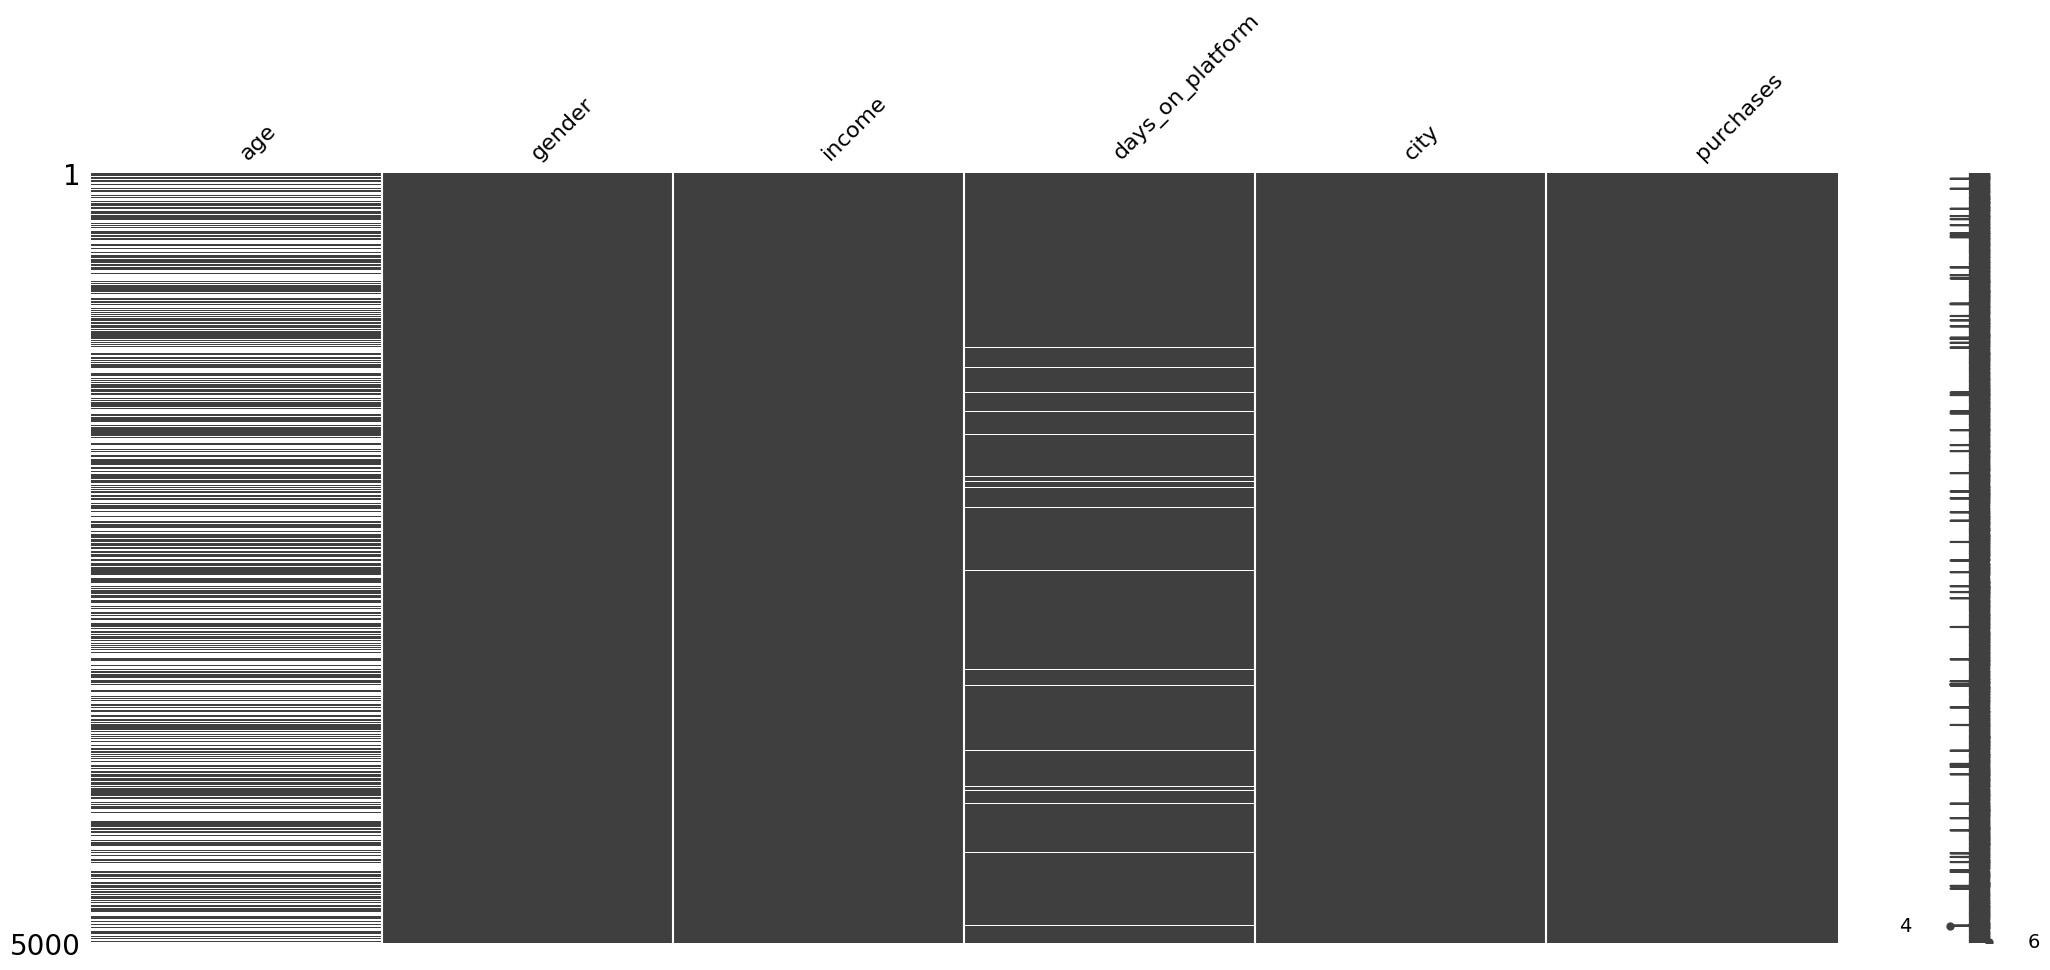

In [120]:
msno.matrix(data)

<Axes: >

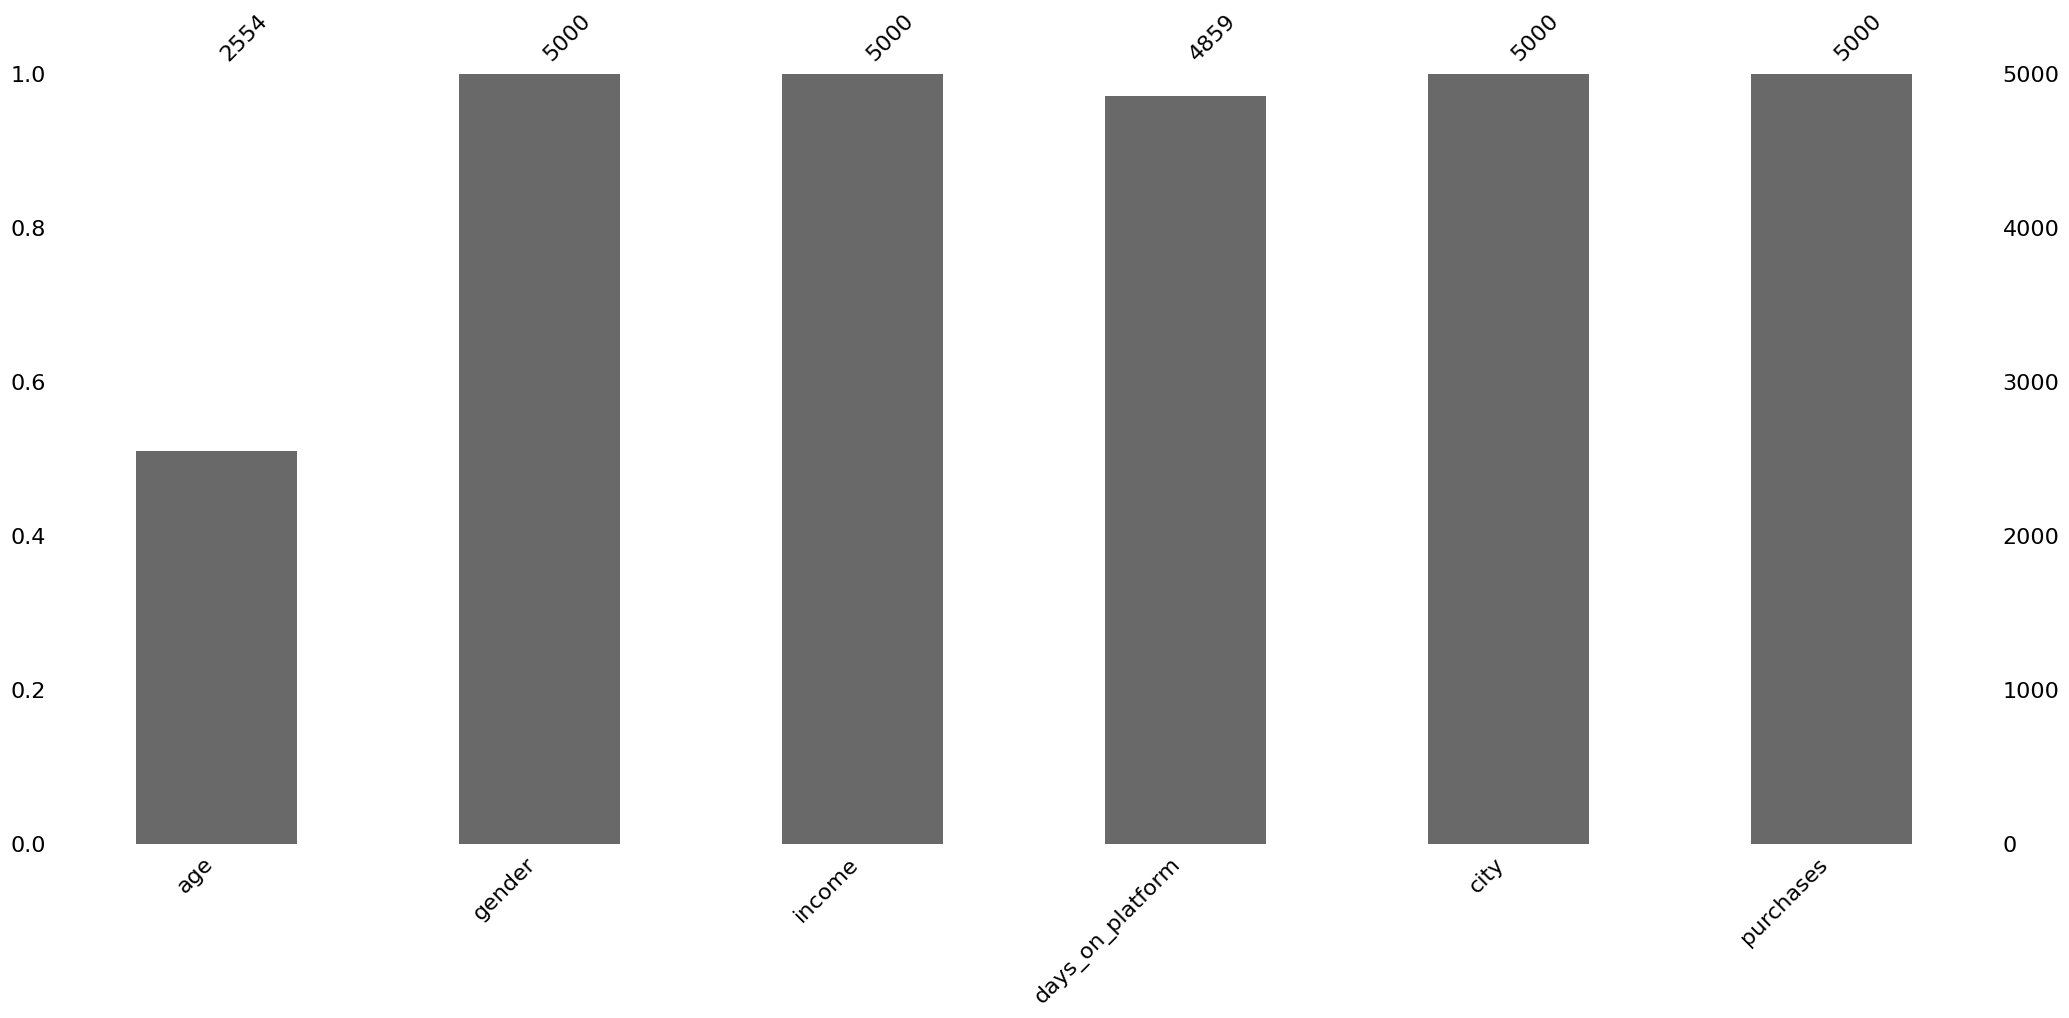

In [121]:
msno.bar(data)

<Axes: >

<Figure size 600x500 with 0 Axes>

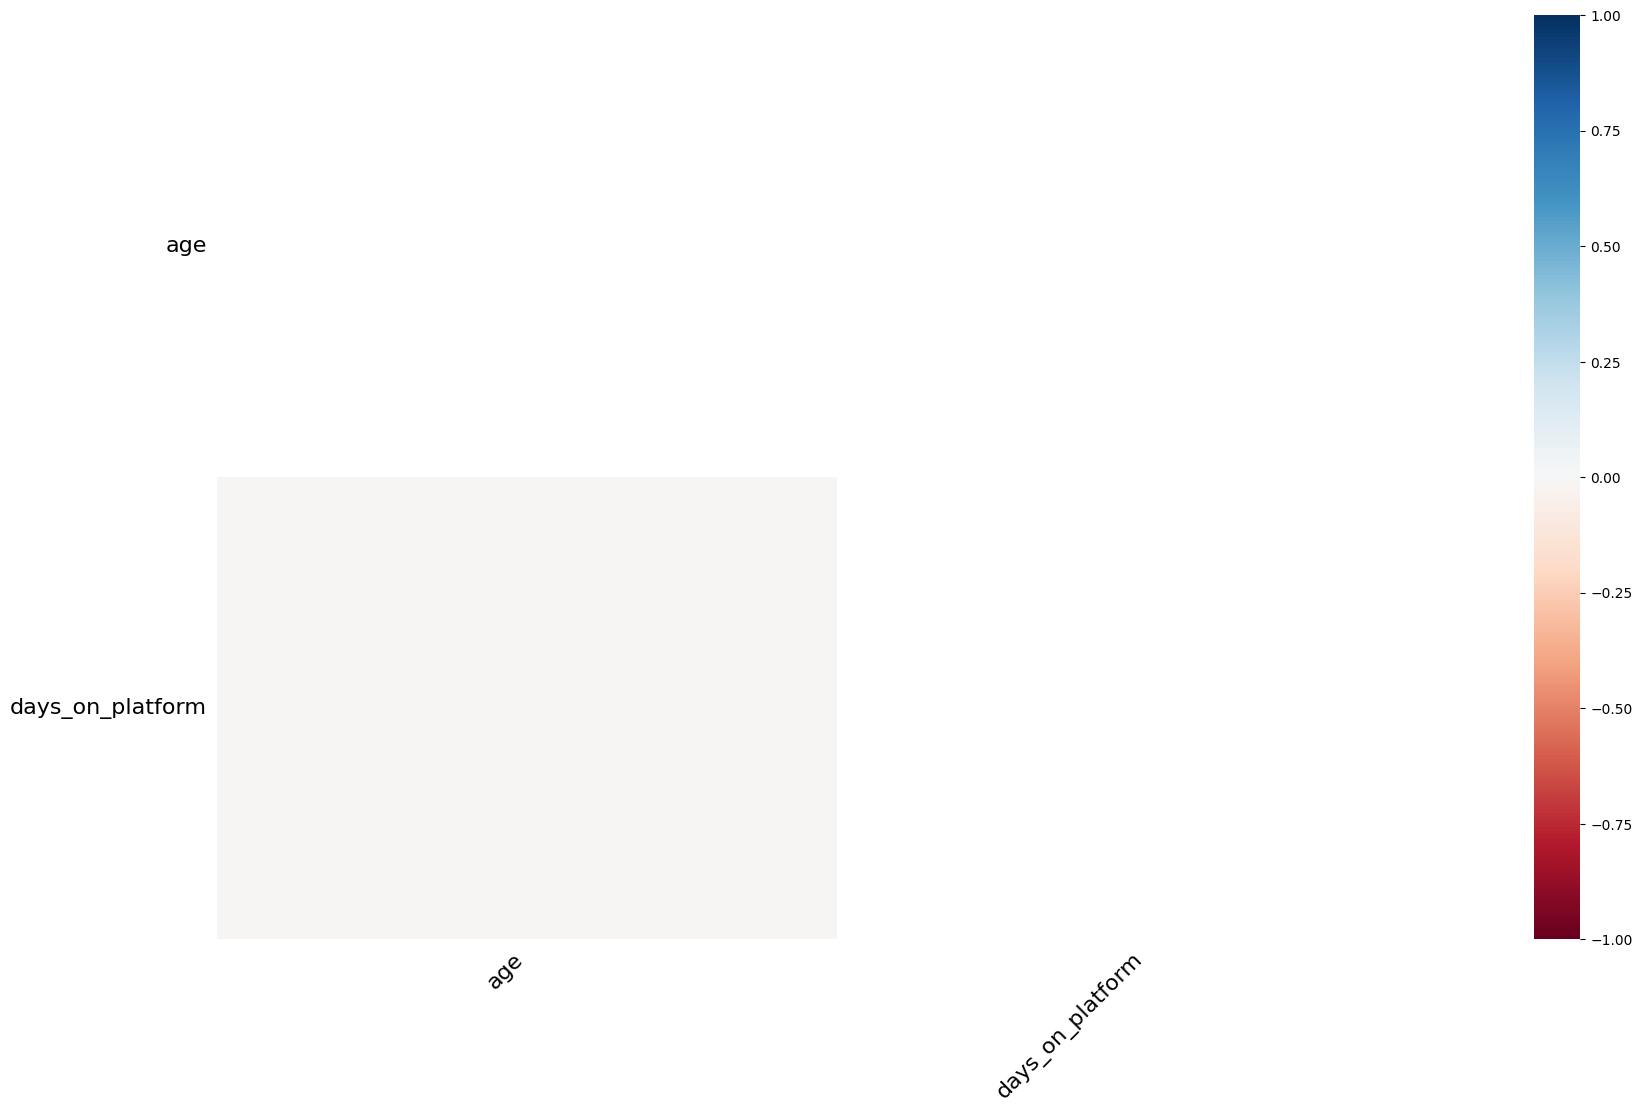

In [122]:
plt.figure(figsize=(6,5))
msno.heatmap(data)

### No seen Reason for missingness in the data (MCAR)

Hence Imputing the mean is plausible

### Checking for Outliers

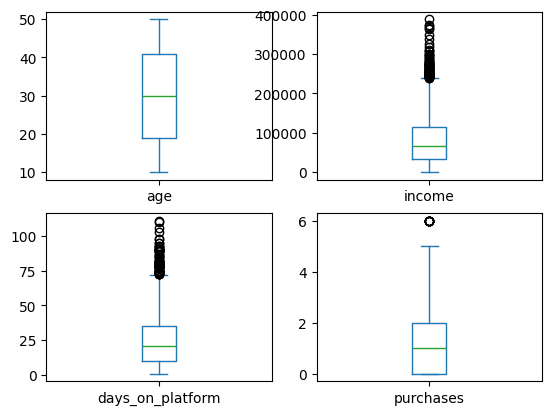

In [123]:
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### days_on_platform has outliers

In [124]:
dop_q1 = data['days_on_platform'].quantile(0.25)
dop_q3 = data['days_on_platform'].quantile(0.75)

dop_iqr = dop_q3 - dop_q1

no_outliers = data[(data['days_on_platform'] < (dop_q3 + 1.5 * dop_iqr)) & (data['days_on_platform'] > (dop_q1 - 1.5 * dop_iqr))]['days_on_platform']

### Imputing the mean of the days_on_platform column

In [125]:
dop_mean = no_outliers.mean()

data['days_on_platform'].fillna(dop_mean, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_22008\1499173865.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['days_on_platform'].fillna(dop_mean, inplace=True)


### Handling age on the missingness

<Axes: >

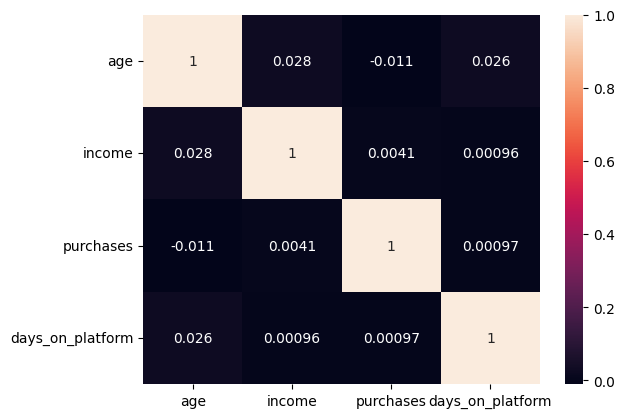

In [126]:
sns.heatmap(data[['age', 'income', 'purchases', 'days_on_platform']].corr(), annot=True)    

### age has a score of 0.019 on the correlation heatmap while 48.92% of its data is missing

### hence the plausible thing to do is delete the age  or delete the null entries of the column

In [137]:
# deleting the null entries of the age column
data.dropna(subset=['age'], inplace=True)

<Axes: >

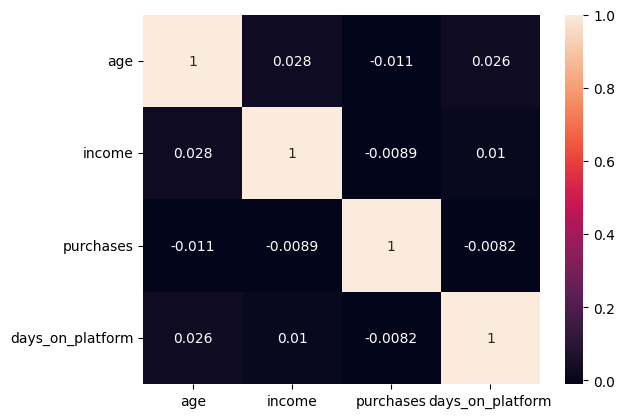

In [138]:
sns.heatmap(data[['age', 'income', 'purchases', 'days_on_platform']].corr(), annot=True)    

In [130]:
data.isnull().sum()

age                 2446
gender                 0
income                 0
days_on_platform       0
city                   0
purchases              0
dtype: int64

### Age Distribution

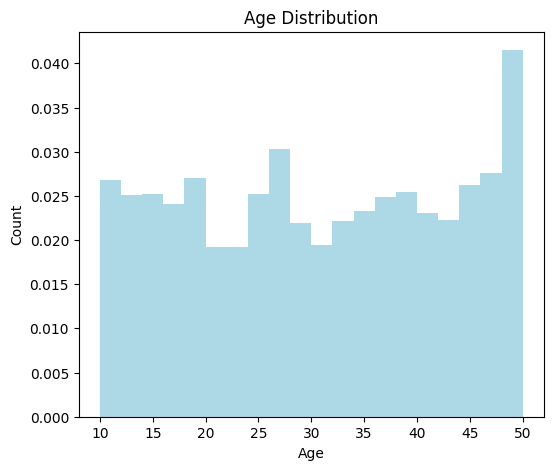

In [141]:
age = data['age']

plt.figure(figsize=(6,5))
plt.hist(age, bins=20, color='lightblue', density=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Income Distribution

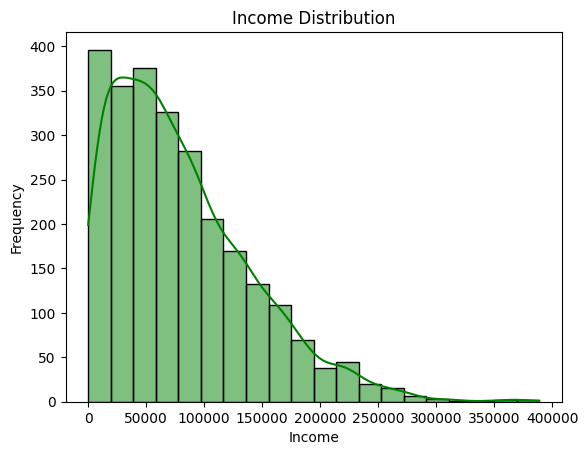

In [156]:
sns.histplot(data['income'], bins=20, color='green', kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

### Average income per City

C:\Users\user\AppData\Local\Temp\ipykernel_22008\1360837772.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, mean_income[i], round(mean_income[i], 2), ha='center', va='bottom')


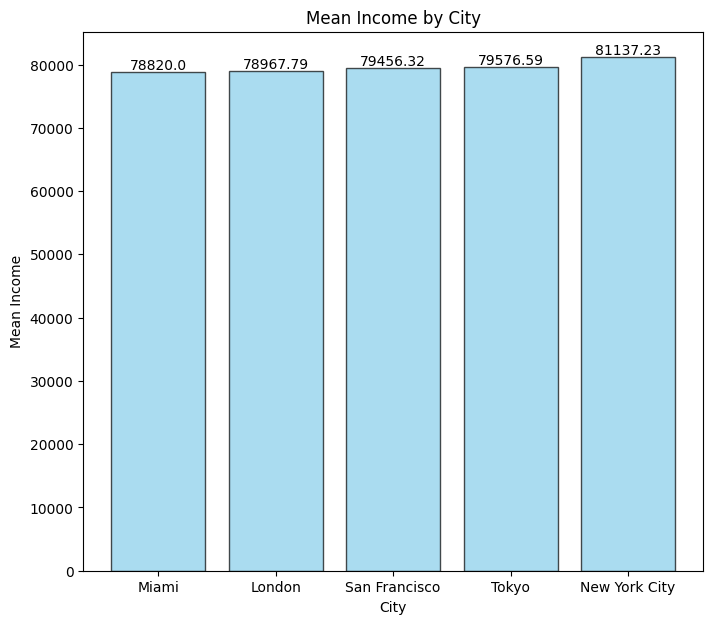

In [132]:
mean_income = data.groupby('city')['income'].mean().sort_values()

# indicating the city with the highest mean income
mean_income.idxmax()

plt.figure(figsize=(8,7))
plt.bar(mean_income.index, mean_income, color='skyblue', edgecolor='black', linewidth=1, alpha=0.7, align='center')	
# annotating the cities values
for i in range(len(mean_income)):
    plt.text(i, mean_income[i], round(mean_income[i], 2), ha='center', va='bottom')
plt.xlabel('City')
plt.ylabel('Mean Income')
plt.title('Mean Income by City')
plt.show()

### Mean Gender Income

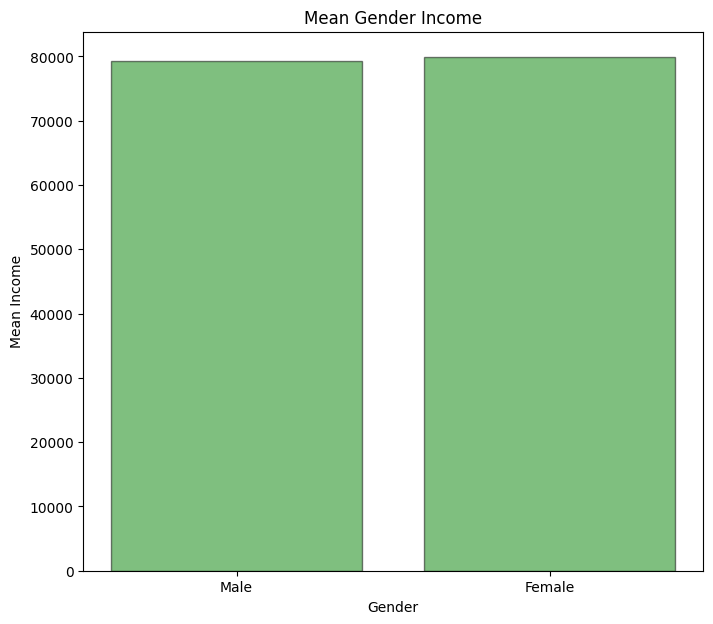

In [133]:
gender_income = data.groupby('gender')['income'].mean().sort_values()

plt.figure(figsize=(8,7))
plt.bar(gender_income.index, gender_income, color='green', edgecolor='black', alpha=0.5, align='center')
plt.xlabel('Gender')
plt.ylabel('Mean Income')
plt.title('Mean Gender Income')
plt.show()

In [140]:
data

,age,gender,income,days_on_platform,city,purchases
2,24.0,Male,104723,34.0,London,1
3,29.0,Male,43791,28.0,London,2
4,18.0,Female,132181,26.0,London,2
5,23.0,Male,12315,14.0,New York City,0
8,46.0,Male,129157,23.0,New York City,0
...,...,...,...,...,...,...
4986,23.0,Male,75425,6.0,London,1
4989,47.0,Female,84987,30.0,Tokyo,0
4990,33.0,Male,3020,89.0,New York City,0
4991,36.0,Female,26173,34.0,Tokyo,0


### Correlation between Age and Income

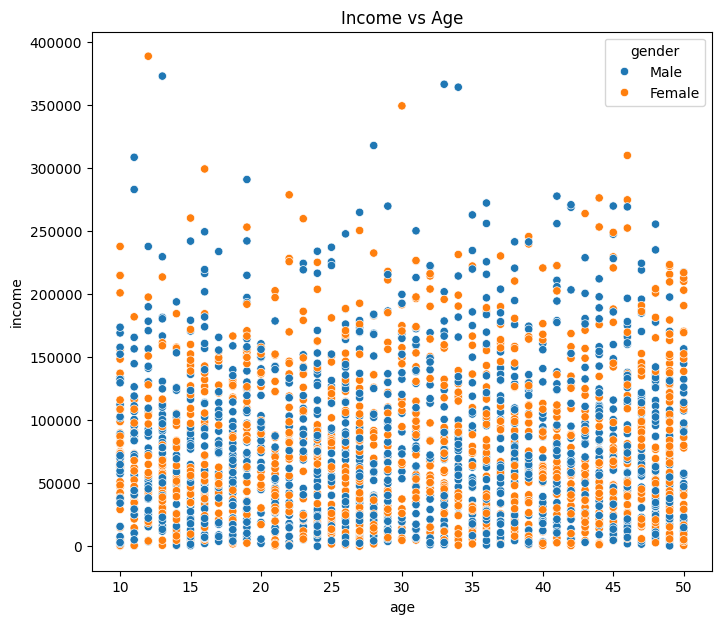

In [157]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='age', y='income', data=data, hue='gender')
plt.title('Income vs Age')
plt.show()